In [16]:
from sklearn.naive_bayes import GaussianNB
import os
from collections import Counter
import numpy as np

def make_Dictionary(root_dir):
   all_words = []
   emails = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]
   for mail in emails:
        with open(mail) as m:
            for line in m:
                words = line.split()
                all_words += words
   dictionary = Counter(all_words)
   # if you have python version 3.x use commented version.
   list_to_remove = list(dictionary)
   #list_to_remove = dictionary.keys()
   for item in list_to_remove:
       # remove if numerical. 
       if item.isalpha() == False:
            del dictionary[item]
       elif len(item) == 1:
            del dictionary[item]
    # consider only most 3000 common words in dictionary.
   dictionary = dictionary.most_common(3000)
   return dictionary

In [26]:
def extract_features(mail_dir):
  files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]
  features_matrix = np.zeros((len(files),3000))
  train_labels = np.zeros(len(files))
  count = 0;
  docID = 0;
  for fil in files:
    with open(fil) as fi:
      for i,line in enumerate(fi):
        if i == 2:
          words = line.split()
          for word in words:
            wordID = 0
            for i,d in enumerate(dictionary):
              if d[0] == word:
                wordID = i
                features_matrix[docID,wordID] = words.count(word)
      train_labels[docID] = 0;
      filepathTokens = fil.split('\\')
      lastToken = filepathTokens[len(filepathTokens) - 1]
      print(lastToken)
      if lastToken.startswith("spmsg"):
          train_labels[docID] = 1;
          count = count + 1
      docID = docID + 1
  return features_matrix, train_labels

In [27]:
TRAIN_DIR = "./train-mails"
TEST_DIR = "./test-mails"
dictionary = make_Dictionary(TRAIN_DIR)
# using functions mentioned above.
features_matrix, labels = extract_features(TRAIN_DIR)
test_feature_matrix, test_labels = extract_features(TEST_DIR)

3-1msg1.txt
3-1msg2.txt
3-1msg3.txt
3-375msg1.txt
3-378msg1.txt
3-378msg2.txt
3-378msg3.txt
3-378msg4.txt
3-378msg5.txt
3-379msg1.txt
3-379msg2.txt
3-379msg3.txt
3-380msg1.txt
3-380msg2.txt
3-380msg3.txt
3-380msg4.txt
3-380msg5.txt
3-380msg6.txt
3-380msg7.txt
3-383msg0.txt
3-383msg1.txt
3-384msg0.txt
3-384msg1.txt
3-384msg2.txt
3-384msg3.txt
3-385msg1.txt
3-385msg2.txt
3-385msg3.txt
3-387msg0.txt
3-387msg1.txt
3-387msg2.txt
3-388msg1.txt
3-389msg1.txt
3-390msg0.txt
3-390msg1.txt
3-390msg2.txt
3-390msg3.txt
3-390msg4.txt
3-390msg5.txt
3-391msg1.txt
3-392msg0.txt
3-392msg1.txt
3-395msg1.txt
3-395msg2.txt
3-397msg1.txt
3-398msg1.txt
3-401msg1.txt
3-402msg1.txt
5-1298msg1.txt
5-1298msg2.txt
5-1298msg3.txt
5-1300msg1.txt
5-1300msg2.txt
5-1300msg3.txt
5-1301msg1.txt
5-1302msg1.txt
5-1303msg1.txt
5-1303msg2.txt
5-1303msg3.txt
5-1304msg1.txt
5-1307msg1.txt
5-1307msg2.txt
5-1307msg3.txt
5-1311msg1.txt
5-1311msg2.txt
5-1311msg3.txt
5-1312msg1.txt
5-1312msg2.txt
5-1312msg3.txt
5-1315msg1.txt
5-13

spmsgb2.txt
spmsgb20.txt
spmsgb21.txt
spmsgb22.txt
spmsgb23.txt
spmsgb24.txt
spmsgb25.txt
spmsgb26.txt
spmsgb27.txt
spmsgb28.txt
spmsgb29.txt
spmsgb3.txt
spmsgb30.txt
spmsgb31.txt
spmsgb32.txt
spmsgb33.txt
spmsgb34.txt
spmsgb35.txt
spmsgb36.txt
spmsgb37.txt
spmsgb38.txt
spmsgb39.txt
spmsgb4.txt
spmsgb40.txt
spmsgb41.txt
spmsgb42.txt
spmsgb43.txt
spmsgb44.txt
spmsgb45.txt
spmsgb46.txt
spmsgb47.txt
spmsgb48.txt
spmsgb49.txt
spmsgb5.txt
spmsgb50.txt
spmsgb51.txt
spmsgb52.txt
spmsgb53.txt
spmsgb54.txt
spmsgb55.txt
spmsgb56.txt
spmsgb57.txt
spmsgb58.txt
spmsgb59.txt
spmsgb6.txt
spmsgb60.txt
spmsgb61.txt
spmsgb62.txt
spmsgb63.txt
spmsgb64.txt
spmsgb65.txt
spmsgb66.txt
spmsgb67.txt
spmsgb68.txt
spmsgb69.txt
spmsgb7.txt
spmsgb70.txt
spmsgb71.txt
spmsgb72.txt
spmsgb73.txt
spmsgb74.txt
spmsgb75.txt
spmsgb76.txt
spmsgb77.txt
spmsgb78.txt
spmsgb79.txt
spmsgb8.txt
spmsgb80.txt
spmsgb81.txt
spmsgb82.txt
spmsgb83.txt
spmsgb84.txt
spmsgb85.txt
spmsgb86.txt
spmsgb87.txt
spmsgb88.txt
spmsgb89.txt
spmsgb

In [30]:
model = GaussianNB()
#train model
model.fit(features_matrix, labels)
#predict

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
predicted_labels = model.predict(test_feature_matrix)

In [3]:
type(predicted_labels)

numpy.ndarray

In [5]:
type(test_labels)

numpy.ndarray

In [10]:
from sklearn.metrics import confusion_matrix as cm

In [32]:
k = cm(test_labels, predicted_labels)

In [33]:
k

array([[129,   1],
       [  9, 121]], dtype=int64)

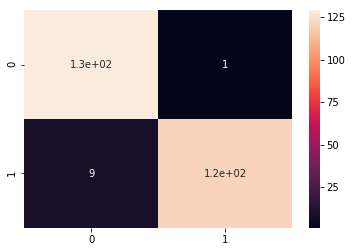

In [36]:
%matplotlib inline
import seaborn as sns
sns.heatmap(k, annot=True)

In [37]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [38]:
mu = MultinomialNB()
be = BernoulliNB()
mu.fit(features_matrix, labels)
be.fit(features_matrix, labels)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [39]:
predict_mu = mu.predict(test_feature_matrix)
predict_be = be.predict(test_feature_matrix)

In [40]:
mu_ = cm(test_labels, predict_mu)
be_ = cm(test_labels, predict_be)

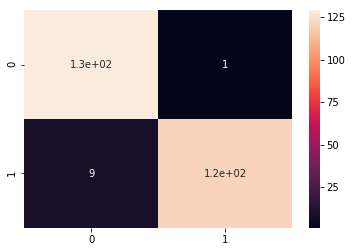

In [41]:
sns.heatmap(mu_, annot=True)

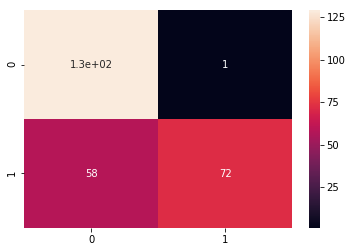

In [42]:
sns.heatmap(be_, annot=True)

In [43]:
be_

array([[129,   1],
       [ 58,  72]], dtype=int64)

In [45]:
mu_

array([[129,   1],
       [  9, 121]], dtype=int64)